In [60]:
from PIL import Image
import os
from random import randint
import random
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

In [61]:
img_folder = '/nfs/site/disks/ddi_sd_01/abalusan/courses/ailc_dl/4.img_net_samples/'
imgs = os.listdir(img_folder)
#print(len(imgs))
#open 10 images and resize
ten_random_imgs = random.sample(imgs, 10)
batch_x = [Image.open(img_folder +p).resize((224,224)) for p in ten_random_imgs]


In [62]:
batch_x[9]
np.mean(np.array(batch_x[9]), axis=(0,1))

#s = np.array([[1,2,3], [4,5,6]])
#s.mean(axis=1)

array([120.67057956,  93.7584104 ,  56.51992985])

In [63]:
mean_dict = {}

def normalize_img(x, idx: int):
    x = x/np.max(x) # all pixel values are from [0,1]
    mean = np.mean(x, axis=(0,1))
    std = np.std(x, axis=(0,1))
    global mean_dict
    mean_dict[idx] = [mean, std]
    return (x - mean)/std

In [64]:
def denormalize_img(x, idx: int):
    global mean_dict
    mean = mean_dict.get(idx)[0]
    std = mean_dict.get(idx)[1]
    x = std * x + mean
    x = np.clip(x, 0, 1)
    return x


In [65]:
lam = 0.75 
batch_size = len(batch_x)
curr_img = normalize_img(np.array(batch_x[0]),0)
ridx = randint(0, batch_size - 1)
random_img_from_batch = normalize_img(np.array(batch_x[ridx]), ridx)

(-0.5, 223.5, 223.5, -0.5)

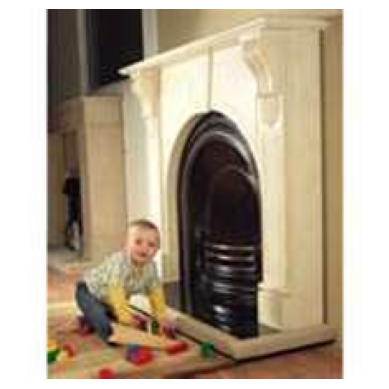

In [66]:
plt.imshow(denormalize_img(curr_img, 0))
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

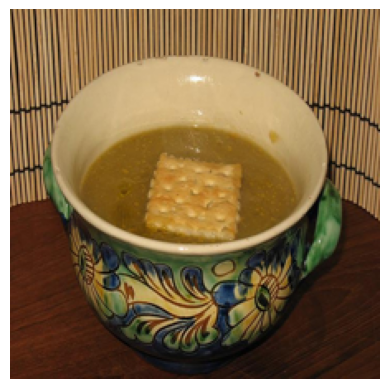

In [67]:
plt.imshow(denormalize_img(random_img_from_batch, ridx))
plt.axis("off")

In [68]:
mixed_img = lam* curr_img + (1-lam)*random_img_from_batch

(-0.5, 223.5, 223.5, -0.5)

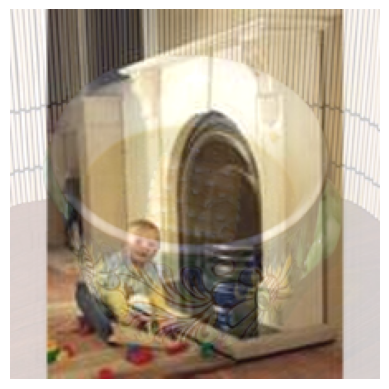

In [69]:
plt.imshow(denormalize_img(mixed_img, 0))
plt.axis("off")

$\lambda$ is lam which determines the strength of the noise in the real image. 
XE is the cross entropy loss. 
Since the input is a mixed image, we want to make sure that the output label prediction loss should be in the same proportions of mixed images. 

Loss = $\lambda$ *  XE(pred,y_a) + (1 - $\lambda$) * XE(pred,y_b)
